In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack

import keras.backend as K
import librosa
import librosa.display

import IPython.display as ipd
%matplotlib inline

C:\Users\Diogo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.DataFrame()

In [3]:
path = './Class1/'

df_class1 = []

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class1.append(np.load(filename))
    dataset.loc[i, 'Class'] = '1' #defining label

In [4]:
path = './Class2/'

df_class2 = []

rows_class1 = dataset.shape[0]

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class2.append(np.load(filename))
    dataset.loc[i + rows_class1, 'Class'] = '2' #defining label

In [5]:
raw = df_class1 + df_class2
print(len(raw))

48


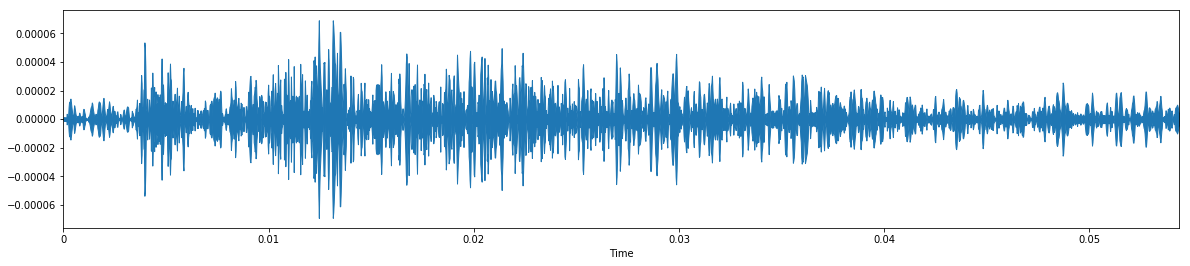

In [126]:
plt.figure(figsize=(20, 4))
fs = 44100
librosa.display.waveplot(raw[0], sr=fs)
plt.show()

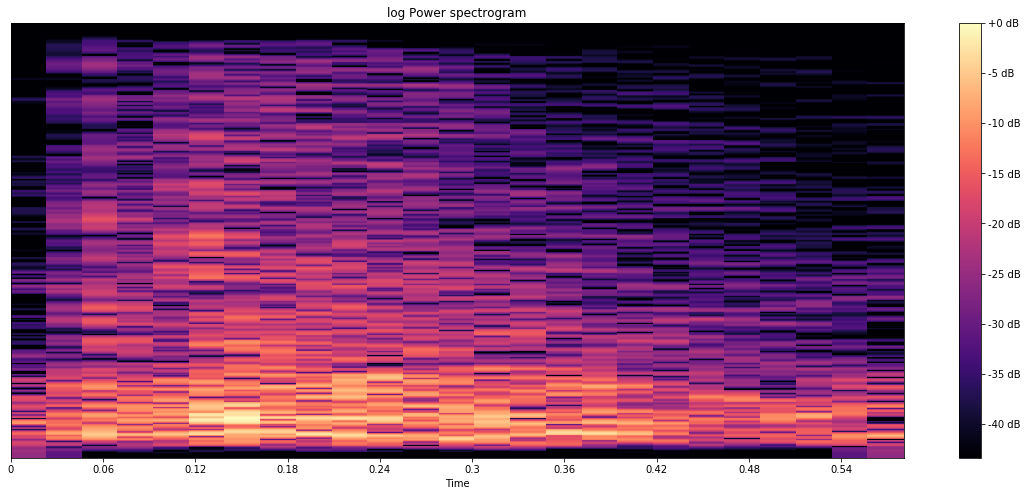

In [10]:
mag, phase = librosa.magphase(librosa.stft(raw[0], n_fft=1024, win_length=400))
plt.figure(figsize=(20,8))
librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), x_axis='time')
plt.title('log Power spectrogram for the sinal #0')
plt.colorbar(format='%+2.0f dB')
plt.show()

Mel spectogram of Class1 (top row) and Class2 (bottom row)


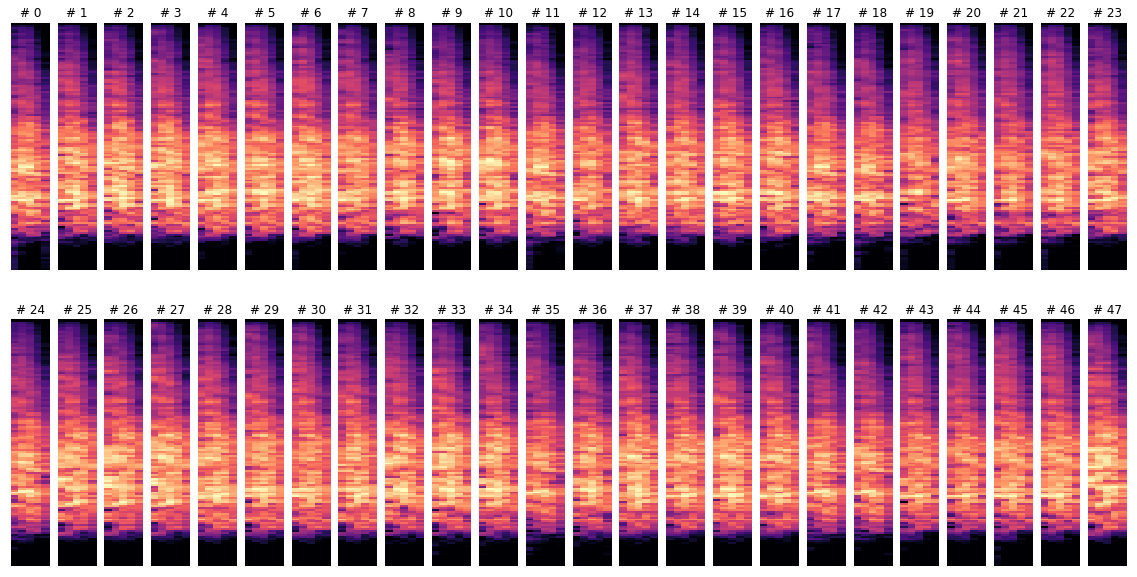

In [124]:
plt.figure(num=None, figsize=(20, 10))
print('Mel spectogram of Class1 (top row) and Class2 (bottom row)')

for i, signal in enumerate(raw):
    plt.subplot(len(raw)/24,24,i+1)
    
    mag, phase = librosa.magphase(librosa.stft(y=signal, n_fft=1024, win_length=400))
    
    S = librosa.feature.melspectrogram(y=signal, sr=44100)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    
    plt.title('# ' + str(i))
    plt.axis('off')
    
plt.show()

Magnitude of Class1 (top row) and Class2 (bottom row)


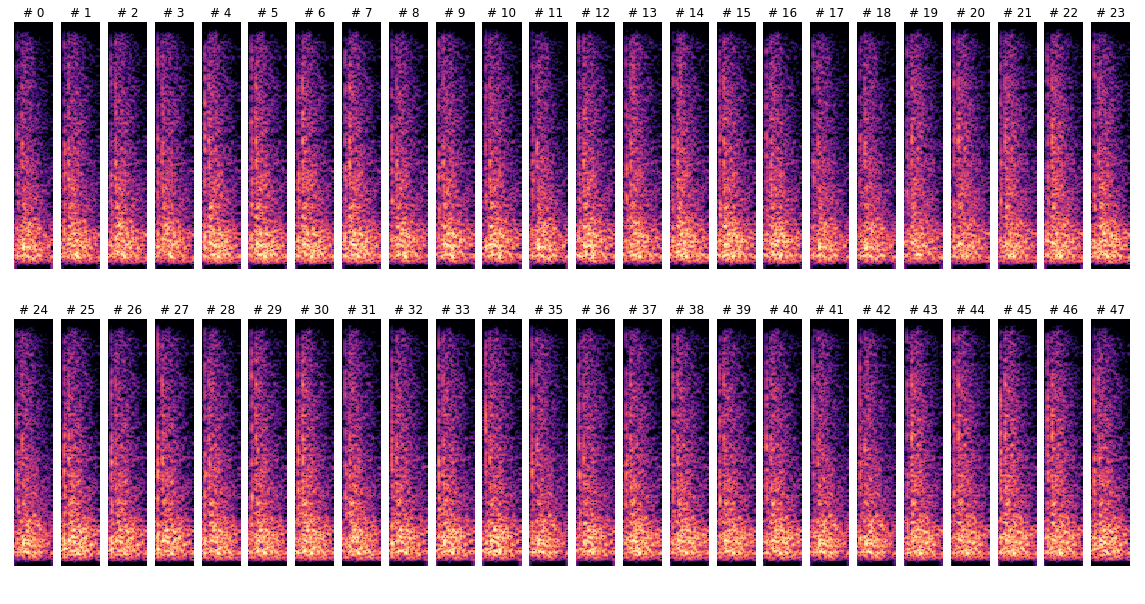

In [125]:
plt.figure(num=None, figsize=(20, 10))
print('Magnitude of Class1 (top row) and Class2 (bottom row)')

for i, signal in enumerate(raw):
    plt.subplot(len(raw)/24,24,i+1)
    
    mag, phase = librosa.magphase(librosa.stft(y=signal, n_fft=1024, win_length=400))
    librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), x_axis='time')
    
    plt.title('# ' + str(i))
    plt.axis('off')
    
plt.show()

Magnitude of Class1 (top row) and Class2 (bottom row) in the interval 200, 400


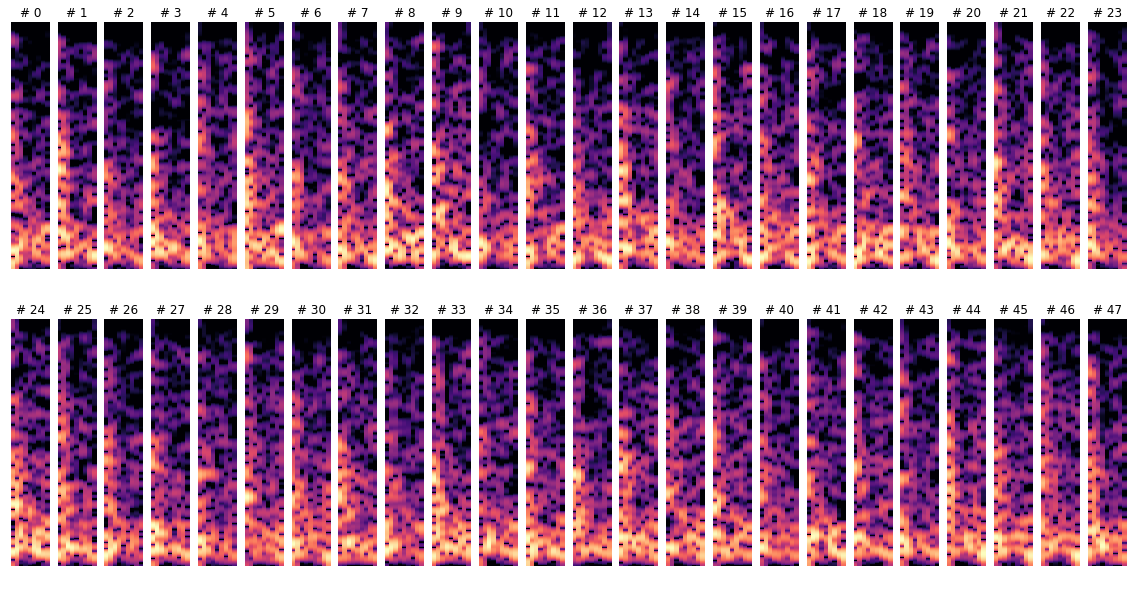

In [122]:
plt.figure(num=None, figsize=(20, 10))

index_begin = 200
index_final = 400

print('Magnitude of Class1 (top row) and Class2 (bottom row) in the interval '
      + str(index_begin) + ', ' + str(index_final)
     )

for i, signal in enumerate(raw):
    plt.subplot(len(raw)/24,24,i+1)
    
    signal = signal[index_begin:index_final]
    
    mag, phase = librosa.magphase(librosa.stft(y=signal, n_fft=1024, win_length=100))
    librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), x_axis='time')
    
    plt.title('# ' + str(i))
    plt.axis('off')
    
plt.show()

In [104]:
def rmse(y, fs=44100, normalize=False):
    frame_len = int(1 * fs /1000) # 1ms
    frame_shift = int(0.05 * fs /1000) # 0.05ms
    
    # calculate RMS
    rms = librosa.feature.rmse(y, frame_length=frame_len, hop_length=frame_shift)
    rms = rms[0]
    
    if normalize:
        rms = librosa.util.normalize(rms, axis=0)
    
    return rms

def zcr(y, fs=44100, normalize=False): 
    frame_len = int(1 * fs /1000) # 1ms
    frame_shift = int(0.05 * fs /1000) # 0.05ms
    
    # calculate zero-crossing rate
    zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_len, hop_length=frame_shift, threshold=0)
    zcr = zcr[0]
    
    if normalize:
        zcr = librosa.util.normalize(zrc, axis=0)
    
    return zcr

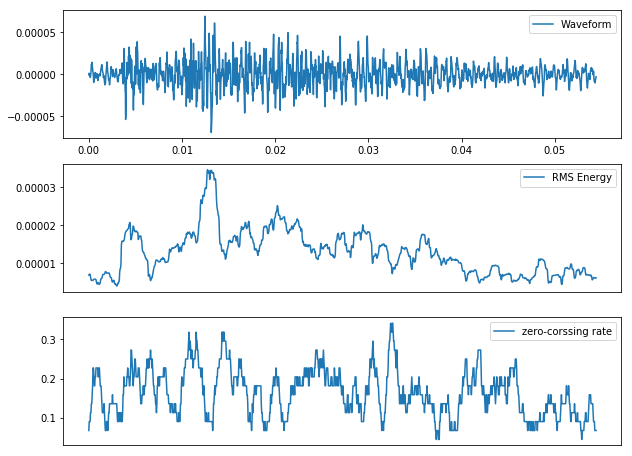

In [91]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
t = np.linspace(0, len(raw[0])/fs, len(raw[0]))
plt.plot(t, raw[0], label='Waveform')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(rmse(raw[0]).T, label='RMS Energy')
plt.xticks([])
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(zrc(raw[0]).T, label='zero-corssing rate')
plt.xticks([])
plt.legend(loc='best')
plt.show()

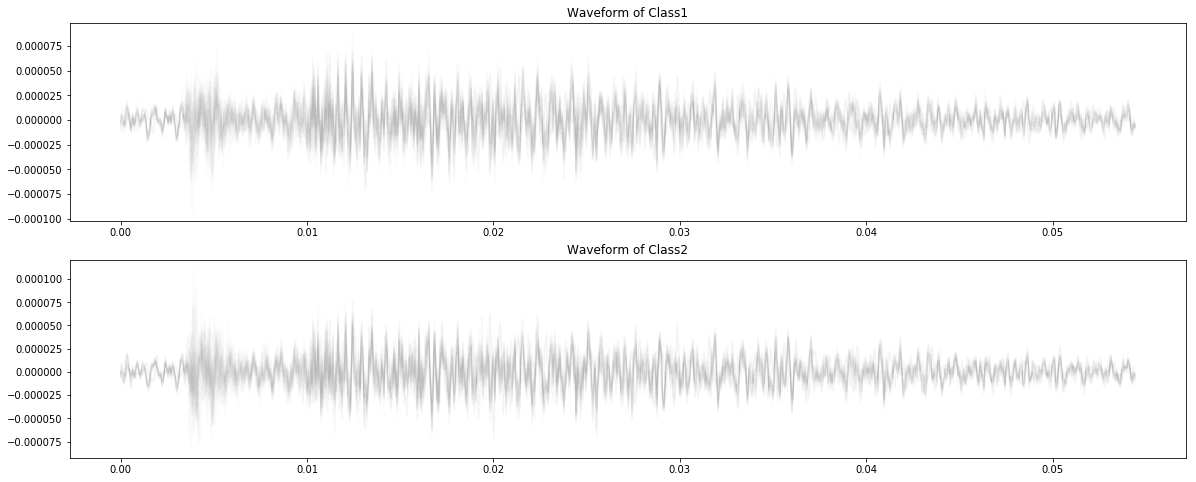

In [92]:
plt.subplots(2, 1, figsize=(20, 8))

alpha=0.01

t = np.linspace(0, len(y)/fs, len(raw[0]))

plt.subplot(2, 1, 1)
for i, y in enumerate(raw[0:24]):    
    plt.plot(t, y, c='k', alpha=alpha)
    plt.title('Waveform of Class1')

plt.subplot(2, 1, 2)
for i, y in enumerate(raw[24:48]):
    plt.plot(t, y, c='k', alpha=alpha)
    plt.title('Waveform of Class2')
    
plt.show()

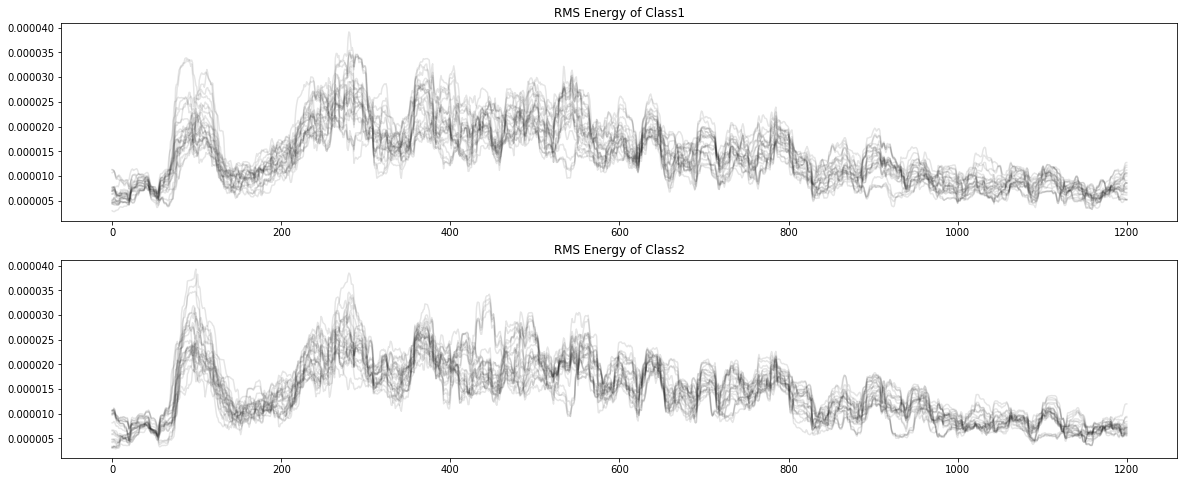

In [96]:
plt.subplots(2, 1, figsize=(20, 8))

alpha=0.1

plt.subplot(2, 1, 1)
for i, y in enumerate(raw[0:24]):
    plt.plot(rmse(y).T, c='k', alpha=alpha)
    plt.title('RMS Energy of Class1')

plt.subplot(2, 1, 2)
for i, y in enumerate(raw[24:48]):
    plt.plot(rmse(y).T, c='k', alpha=alpha)
    plt.title('RMS Energy of Class2')
    
plt.show()

In [103]:
print(zcr(y))

<function zrc at 0x000000683A098400>


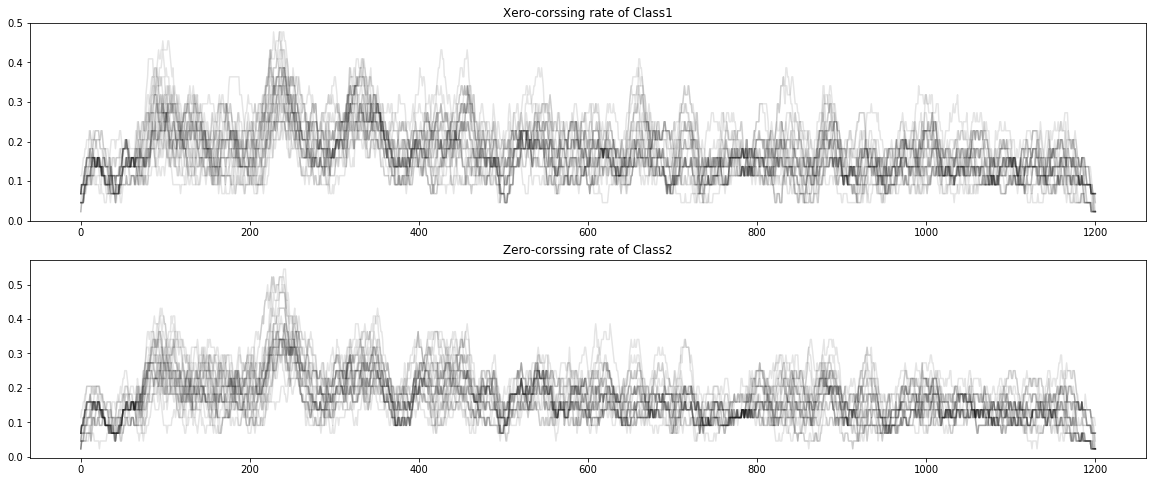

In [105]:
plt.subplots(2, 1, figsize=(20, 8))

alpha=0.1

plt.subplot(2, 1, 1)
for i, y in enumerate(raw[0:24]):
    plt.plot(zcr(y), c='k', alpha=alpha)
    plt.title('Xero-corssing rate of Class1')

plt.subplot(2, 1, 2)
for i, y in enumerate(raw[24:48]):
    plt.plot(zcr(y), c='k', alpha=alpha)
    plt.title('Zero-corssing rate of Class2')
    
plt.show()